In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Load preprocessed data

In [2]:
emg = np.load('emg_all.npy')
imu = np.load('imu_all.npy')
labels = np.load('labels_all.npy')
subjects = np.load('subjects_all.npy')
sessions = np.load('sessions_all.npy')

# EDA

In [3]:
emg = emg[labels>=6]
imu = imu[labels>=6]
subjects = subjects[labels>=6]
labels = labels[labels>=6]

In [4]:
left = [1,  2,  3,  6,  7, 12, 16, 17, 18, 20, 21, 23, 24, 27, 30] #1
right = [4,  5,  8,  9, 10, 11, 13, 14, 15, 19, 20, 21, 22, 25, 26, 28, 29, 31] #0

In [5]:
foot = np.zeros(len(subjects),dtype=int)
strong_foot = np.zeros(len(subjects),dtype=int)
i_foot = []
h_foot = []
for i in range(len(subjects)):
    if subjects[i] in right:
        foot[i] = 0
        strong_foot[i] = 4
        i_foot.append('right')
        h_foot.append('left')
    else:
        foot[i] = 4
        strong_foot[i] = 0
        i_foot.append('left')
        h_foot.append('right')

### the std of normal gait is much higher than the other two for all IMUs, especially the gastrocnemius

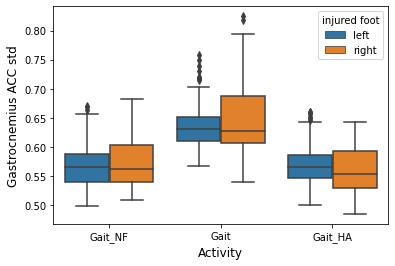

In [6]:
stds_i = np.zeros(len(foot))
stds_h = np.zeros(len(strong_foot))
for i in range(len(foot)):
    stds_i[i] = np.std(imu[i,foot[i]*6+18:foot[i]*6+21,:])
    
df = pd.DataFrame({'std':stds_i,'injured foot':i_foot, 
                  'activity':labels})
df['activity'].replace({6: 'Gait', 7: 'Gait_NF', 8: 'Gait_HA',},inplace=True)

g = sns.boxplot(data=df, x="activity",y='std',hue='injured foot',showfliers=True)

plt.xlabel('Activity', fontsize=12)
plt.ylabel('Gastrocnemius ACC std', fontsize=12)
plt.show()

g.figure.savefig('walking_std.png',dpi=300)

### Gait_ha for the muscle tibialis anterior is very high

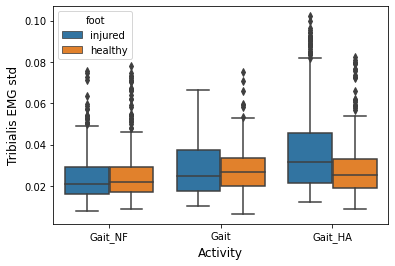

In [7]:
stds_i = np.zeros(len(foot))
stds_h = np.zeros(len(strong_foot))
for i in range(len(foot)):
    stds_i[i] = np.std(emg[i,foot[i]+2,:])
    stds_h[i] = np.std(emg[i,strong_foot[i]+2,:])
    
df = pd.DataFrame({'std':np.concatenate([stds_i,stds_h]),'foot':['injured']*len(foot)+['healthy']*len(strong_foot), 
                  'activity':np.concatenate([labels,labels])})
df['activity'].replace({6: 'Gait', 7: 'Gait_NF', 8: 'Gait_HA',},inplace=True)

g = sns.boxplot(data=df, x="activity",y='std',hue='foot',showfliers=True)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Tibialis EMG std', fontsize=12)
plt.show()

g.figure.savefig('walking_ha_emg_tibialis.png',dpi=300)

### Y-axis for the IMU on the gastrocnemius

In [8]:
import scipy
from scipy.stats import skew, kurtosis

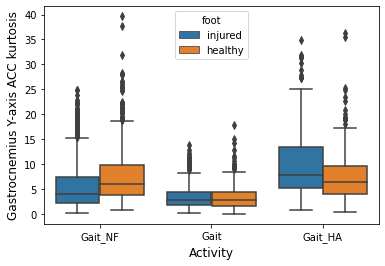

In [9]:
kurt_i = np.zeros(len(foot))
kurt_h = np.zeros(len(strong_foot))
for i in range(len(foot)):
    kurt_i[i] = kurtosis(imu[i,foot[i]*6+13,:])
    kurt_h[i] = kurtosis(imu[i,strong_foot[i]*6+13,:])
    
df = pd.DataFrame({'std':np.concatenate([kurt_i,kurt_h]),'foot':['injured']*len(foot)+['healthy']*len(strong_foot), 
                  'activity':np.concatenate([labels,labels])})
df['activity'].replace({6: 'Gait', 7: 'Gait_NF', 8: 'Gait_HA',},inplace=True)

g = sns.boxplot(data=df, x="activity",y='std',hue='foot',showfliers=True)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Gastrocnemius Y-axis ACC kurtosis', fontsize=12)
plt.show()

g.figure.savefig('walking_kurtosis.png',dpi=300)